# Part 2 : Data versionning using DVC

## Chapter 1 : Getting started with DVC

This is the second part of the tutorial on data versionning using [DVC](https://dvc.org).

In this first chapter, we will install DVC and take a look at how DVC works with GIT in its most simple usage.

### Install DVC

First, we need to install [DVC](https://dvc.org). There are various ways to install it depending on you OS, which you can browse [here](https://dvc.org/doc/install). For example, on MacOS, you can install it with `brew`, `conda`, or `pip`.

If you are following this tutorial on your own machine, chose the option that makes the most sense. If you are following on the notebook, we will install DVC with `pip`:

In [1]:
! pip install dvc

We can check that DVC is installed:

In [2]:
! which dvc

/Users/nicolas.gensollen/opt/anaconda3/envs/now/bin/dvc


In [3]:
! dvc --version

3.27.0


### Initialize a DVC repository

Now that we have DVC installed we can start using it !

First of all, it is very important to understand that DVC is not a replacement for GIT. It is a tool designed to work WITH GIT as it solves a different problem than GIT.

In other words, you need both GIT and DVC to manage both code and data.

To initialize a DVC repository, we need to be in a GIT-initialized repository, so let's do that:

In [4]:
! git init

Initialized empty Git repository in /Users/nicolas.gensollen/GitRepos/NOW-2023/notebooks/.git/


You can check that a `.git` hidden folder was created:

In [5]:
! ls -lah

total 928
drwxr-xr-x  10 nicolas.gensollen  10513   320B 26 oct 19:30 .
drwxr-xr-x  20 nicolas.gensollen  10513   640B 26 oct 14:44 ..
-rw-r--r--   1 nicolas.gensollen  10513   139B 26 oct 14:06 .dvcignore
drwxr-xr-x   9 nicolas.gensollen  10513   288B 26 oct 19:30 .git
-rw-r--r--   1 nicolas.gensollen  10513    24B 26 oct 17:59 .gitignore
drwxr-xr-x   6 nicolas.gensollen  10513   192B 26 oct 19:30 .ipynb_checkpoints
drwxr-xr-x   3 nicolas.gensollen  10513    96B 26 oct 17:58 __pycache__
-rw-r--r--   1 nicolas.gensollen  10513   2,0K 25 oct 12:50 code_versionning.ipynb
-rw-r--r--   1 nicolas.gensollen  10513   448K 26 oct 18:33 data_versionning.ipynb
lrwxr-xr-x   1 nicolas.gensollen  10513    19B 26 oct 19:29 toy_model.py -> ../src/toy_model.py


Now we can initialize the DVC repository:

In [6]:
! dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In the exact same way as for `git init`, `dvc init` created a hidden folder named `.dvc`:

In [7]:
! ls -lah

total 928
drwxr-xr-x  11 nicolas.gensollen  10513   352B 26 oct 19:30 .
drwxr-xr-x  20 nicolas.gensollen  10513   640B 26 oct 14:44 ..
drwxr-xr-x   5 nicolas.gensollen  10513   160B 26 oct 19:30 .dvc
-rw-r--r--   1 nicolas.gensollen  10513   139B 26 oct 14:06 .dvcignore
drwxr-xr-x  10 nicolas.gensollen  10513   320B 26 oct 19:30 .git
-rw-r--r--   1 nicolas.gensollen  10513    24B 26 oct 17:59 .gitignore
drwxr-xr-x   6 nicolas.gensollen  10513   192B 26 oct 19:30 .ipynb_checkpoints
drwxr-xr-x   3 nicolas.gensollen  10513    96B 26 oct 17:58 __pycache__
-rw-r--r--   1 nicolas.gensollen  10513   2,0K 25 oct 12:50 code_versionning.ipynb
-rw-r--r--   1 nicolas.gensollen  10513   448K 26 oct 18:33 data_versionning.ipynb
lrwxr-xr-x   1 nicolas.gensollen  10513    19B 26 oct 19:29 toy_model.py -> ../src/toy_model.py


In addition to this, DVC created a few files for us. To see that, we can use the `git status` command since we have a git repository:

In [8]:
! git status

On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	__pycache__/
	code_versionning.ipynb
	data_versionning.ipynb
	toy_model.py



As we can see, DVC created 2 files in the `.dvc` folder as well as one file in the current workspace :

- `.dvc/.gitignore`
- `.dvc/config`
- `.dvcignore`

These files need to be versionned with GIT, DVC already added them to the stagging aread, so all we need to do is commit them:

In [9]:
! git commit -m "initialize DVC"

[main (root-commit) bf26682] initialize DVC
 3 files changed, 6 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore


In [10]:
! git log

commit bf2668251100145bf5e3fbdb5c9571ca5ae488a4 (HEAD -> main)
Author: NicolasGensollen <nicolas.gensollen@gmail.com>
Date:   Thu Oct 26 19:30:54 2023 +0200

    initialize DVC


And that's it, we have successfully initialized a DVC repository and we are now ready to track some code and data !

### Track code and data

In this section we are going to download some data that we will use as input for a classification model. The objective is to predict whether a patient has AD or not. We are going to keep this same objective for the whole tutorial but we will start very simple and add some complexity up a real experiment scenario.

#### Basic data with a basic model

Let's start VERY simple with a dataset in the form of a TSV file with one row per subject and four columns:

- the patient ID which is just a string identifier
- the volume of this patient's left hypocampus (this will be our first predictive feature)
- the volume of this patient's right hypocampus (this will be second first predictive feature)
- the category of the patient: "AD" if the patient has Alzeihmer disease or "CN" for control (this will be out target)

Let's download the data first. For this, we will use a special DVC command: `dvc get`:

In [11]:
! dvc get https://github.com/aramis-lab/dataset-registry NOW_2023/toy_dataset/version_1
! mv version_1/dataset.tsv .
! rm -r version_1

  0% Downloading version_1|                          |0/1 [00:00<?,    ?files/s]
!
  0%|          |NOW_2023/toy_dataset/version_1/data0.00/? [00:00<?,        ?B/s]
100% Downloading version_1|█████████████████████|1/1 [00:00<00:00,  1.59files/s]
                                                                            

Let's open the TSV file we just downloaded with Pandas and take a look at the subjects data:

In [12]:
import pandas as pd

df = pd.read_csv("dataset.tsv", sep="\t")
df.head()

,subject_id,HC_left_volume,HC_right_volume,group
0,sub-0001,-2.527213,-1.493408,CN
1,sub-0002,2.229916,-3.595829,AD
2,sub-0003,-1.361474,-2.904277,AD
3,sub-0004,1.926797,-1.804495,AD
4,sub-0005,-1.234161,-2.536723,CN


We have 500 subjects:

In [13]:
df.tail()

,subject_id,HC_left_volume,HC_right_volume,group
495,sub-0496,2.124950,-3.041151,CN
496,sub-0497,1.839286,-1.013914,AD
497,sub-0498,2.249130,-2.574720,AD
498,sub-0499,-1.567307,-2.569388,CN
499,sub-0500,-1.087338,-2.931673,CN


In this tutorial, we won't focus on the machine learning aspect of things but rather on the code and data management aspects.

This means that we will treat models as black boxes. For simplicity, models have been wrapped in custom classes offering a very simple API:

- `model.fit()` for fitting the model with some input data
- `model.save()` for saving the model's weights to disk
- `model.plot()` to give us some visuals

Here, we use a toy model (a simple non-linear SVM), and we fit it with the data we just downloaded:

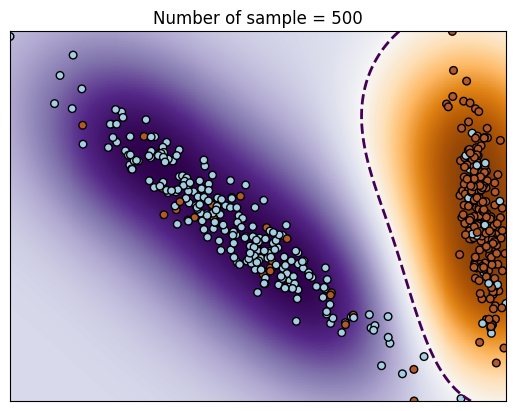

In [14]:
from toy_model import Model

model = Model.from_dataframe(df)
model.fit()  # Fit the model
model.save() # Serialize the trained model
model.plot() # Plot the decision function with the data

We can see that the model is able to learn a decision function to classify subjects with AD from control subjects.

At this point, we are happy we our experiment and we wish to commit our changes. This is the moment where we need to understand what should be tracked with DVC and what should be tracked with GIT.

First, `dataset.tsv` is our input data, so this is clearly something we shouldn't version with GIT (although GIT would manage it with such a simple dataset). We should clearly use DVC to track our dataset. The same goes with our experiment results: `model.pkl` which is our trained model serialized.

Let's track these two files with DVC:

In [15]:
! dvc add dataset.tsv model.pkl

⠋ Checking graph                                       core>
  0% Adding...|                        | dataset.tsv |0/2 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/Users/nicolas.gensollen/GitRepos/NOW-2023/notebooks/.dv
                                                                                
!
  0%|          |Adding dataset.tsv to cache           0/? [00:00<?,     ?file/s]
  0%|          |Adding dataset.tsv to cache           0/1 [00:00<?,     ?file/s]
  0%|          |Adding dataset.tsv to cache           0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/nicolas.gensollen/0/? [00:00<?,    ?files/s]
  0%|          |Checking out /Users/nicolas.gensollen/0/1 [00:00<?,    ?files/s]
  0% Adding...|                          | model.pkl |0/2 [00:00<?,     ?file/s]
!
                                      

As you can see, DVC is helping us by telling us what we should do next !

Tracking `dataset.tsv` and `model.pkl` generated two small metadata files:

- `dataset.tsv.dvc`
- `model.pkl.dvc`

Furthermore, DVC modified our `.gitignore` file to tell GIT to NOT track `dataset.tsv` and `model.pkl`.

All these files are super small and easily managable for GIT. Let's version them with GIT:

In [16]:
! git add dataset.tsv.dvc model.pkl.dvc .gitignore

At this point we can commit our changes and optionally tag the commit.

Here, we will call this the "v1.0" of our experiment, for which we used 500 subjects:

In [17]:
! git commit -m "First model, trained with 500 subjects"
! git tag -a "v1.0" -m "model v1.0, 500 subjects"

[main ec79ae4] First model, trained with 500 subjects
 3 files changed, 12 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 dataset.tsv.dvc
 create mode 100644 model.pkl.dvc


In [18]:
! git log

commit ec79ae49baf2ffdf8b6e65186a456beff0438f43 (HEAD -> main, tag: v1.0)
Author: NicolasGensollen <nicolas.gensollen@gmail.com>
Date:   Thu Oct 26 19:31:27 2023 +0200

    First model, trained with 500 subjects

commit bf2668251100145bf5e3fbdb5c9571ca5ae488a4
Author: NicolasGensollen <nicolas.gensollen@gmail.com>
Date:   Thu Oct 26 19:30:54 2023 +0200

    initialize DVC


#### Data can change

Datasets are not always fixed in time, they may evolve. For example, new data can be collected and added in new dataset releases.

Let's imagine that our dataset received a brand new release with 500 additional subjects. Chances are that this will impact our previous experiment.

How should we handle such an update ?

Let's dive in and download the updated dataset:

In [19]:
! dvc get https://github.com/aramis-lab/dataset-registry NOW_2023/toy_dataset/version_2
! mv version_2/dataset.tsv .
! rm -r version_2

  0% Downloading version_2|                          |0/1 [00:00<?,    ?files/s]
!
  0%|          |NOW_2023/toy_dataset/version_2/data0.00/? [00:00<?,        ?B/s]
100% Downloading version_2|█████████████████████|1/1 [00:00<00:00,  2.46files/s]
                                                                            

As advertized, we now have data for 1000 subjects:

In [20]:
df = pd.read_csv("dataset.tsv", sep="\t")
print(df.head(3))
print(df.tail(3))

  subject_id  HC_left_volume  HC_right_volume group
0   sub-0001       -2.527213        -1.493408    CN
1   sub-0002        2.229916        -3.595829    AD
2   sub-0003       -1.361474        -2.904277    AD
    subject_id  HC_left_volume  HC_right_volume group
997   sub-0998       -2.458242        -1.293853    CN
998   sub-0999       -0.489333        -3.595348    CN
999   sub-1000       -0.962929        -2.354145    CN


Let's recreate a model instance and fit it with our new dataset:

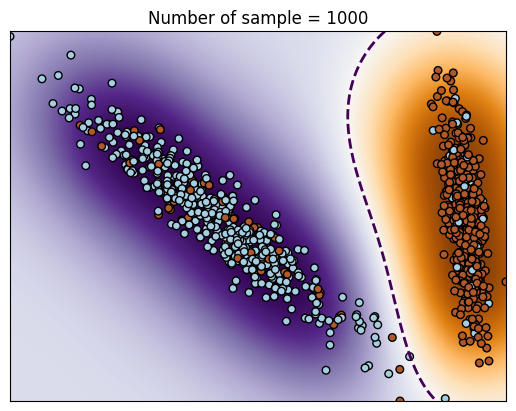

In [21]:
model = Model.from_dataframe(df)
model.fit()
model.save()
model.plot()

Great ! we now have our new model and we can use DVC to see what happened to our tracked data:

In [22]:
! dvc status

dataset.tsv.dvc:                                                                
	changed outs:
		modified:           dataset.tsv
model.pkl.dvc:
	changed outs:
		modified:           model.pkl


As expected, DVC is telling us that both our dataset and our serialized model have changed.

As we would do with GIT, let's add these changes with DVC:

In [23]:
! dvc add dataset.tsv model.pkl

⠋ Checking graph                                       core>
  0% Adding...|                        | dataset.tsv |0/2 [00:00<?,     ?file/s]
!
                                                                                
!
  0% Checking cache in '/Users/nicolas.gensollen/GitRepos/NOW-2023/notebooks/.dv
                                                                                
!
  0%|          |Adding dataset.tsv to cache           0/? [00:00<?,     ?file/s]
  0%|          |Adding dataset.tsv to cache           0/1 [00:00<?,     ?file/s]
  0%|          |Adding dataset.tsv to cache           0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/nicolas.gensollen/0/? [00:00<?,    ?files/s]
  0%|          |Checking out /Users/nicolas.gensollen/0/1 [00:00<?,    ?files/s]
  0% Adding...|                          | model.pkl |0/2 [00:00<?,     ?file/s]
!
                                      

Again, DVC tells us what to do next, let's add the changes to the `.dvc` files with GIT:

In [24]:
! git add dataset.tsv.dvc model.pkl.dvc

We can now commit these changes and tag this commit with a "v2.0" tag:

In [25]:
! git commit -m "Second model, trained with 1000 subjects"
! git tag -a "v2.0" -m "model v2.0, 1000 subjects"

[main 4487778] Second model, trained with 1000 subjects
 2 files changed, 4 insertions(+), 4 deletions(-)


In [26]:
! git log

commit 4487778e5042a13b0d86f5a1e5a87e41e22f1b52 (HEAD -> main, tag: v2.0)
Author: NicolasGensollen <nicolas.gensollen@gmail.com>
Date:   Thu Oct 26 19:31:57 2023 +0200

    Second model, trained with 1000 subjects

commit ec79ae49baf2ffdf8b6e65186a456beff0438f43 (tag: v1.0)
Author: NicolasGensollen <nicolas.gensollen@gmail.com>
Date:   Thu Oct 26 19:31:27 2023 +0200

    First model, trained with 500 subjects

commit bf2668251100145bf5e3fbdb5c9571ca5ae488a4
Author: NicolasGensollen <nicolas.gensollen@gmail.com>
Date:   Thu Oct 26 19:30:54 2023 +0200

    initialize DVC


#### Going back in time

Now, let's imagine that we submitted a paper with the results of our first experiment and that we received the review after having done the new experiment just above.

The reviewer is asking us to add some details on some of our plots. Clearly, we cannot use the new dataset and model to make the new plots !

We need to go back to the state we were in when we generated those plots the first time. Fortunately, this is very easy to do thanks to both GIT and DVC.

In our example, we were smart enough to tag the state of our experiment with the "v1.0" tag (we could have used something more informative like "publication for journal XXX"). 

We can thus simply do:

In [27]:
! git checkout v1.0
! dvc checkout

Note: switching to 'v1.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at ec79ae4 First model, trained with 500 subjects
Building workspace index                              |2.00 [00:00,  162entry/s]
Comparing indexes                                     |3.00 [00:00,  826entry/s]
Applying changes                                      |2.00 [00:00,   573file/s]
M       model.pkl
M       dataset.tsv


Such that we are now in the exact same state as before the data update:

In [28]:
df = pd.read_csv("dataset.tsv", sep="\t")
print(len(df))  # Dataset has 500 subjects

500


Cleaning:

In [29]:
# Do not run this unless you want to start over from scratch...
! rm dataset.tsv*
! rm model.pkl*
! rm -rf .git
! rm -rf .dvc
! rm .gitignore
! rm .dvcignore